In [ ]:
#AUTHOR: Lisa Blum Moyse
#        lisa.blum-moyse@inria.fr
#
# REFERENCE: Blum Moyse & Berry. A coupled neural field model for the standard consolidation theory
#
# LICENSE: CC0 1.0 Universal

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
# Permanent kernel (weight equation)
def wf(x,y,s,DD):
    C = -DD*np.sign(x)
    return (1-np.abs(C+x-y)/s)*np.exp(-np.abs(C+x-y)/s)

# Distance function (weight equation)
def wf1(x,y,s):
    return Ad/s*np.exp(-np.abs(x-y)/s)

# Firing rate function (activity equation)
def  f(u,ka):
    return 1/(1+np.exp(-hf*(u-ka)))

def  fh(u,ka):
    return 1/(1+np.exp(-hfh*(u-ka)))

def  fs(w,h,WF):
    I = dx*np.sum(WF*np.heaviside(w-0.001,0),axis=1) - h
    return I*np.heaviside(I,0)

# Integral of the permanent kernel
def g(x,s):
    return x*np.exp(-np.abs(x)/s)

def h(x,c1,c2,s):
    return g(x-c1,s)-g(x-c2,s)

def diff(wab,ua,ha,ub,hb):
    Fa = np.array([f(ua,ha),]*math.ceil((2*xm+dx)/dx)).transpose()
    Fb = np.array([f(ub,hb),]*math.ceil((2*xm+dx)/dx))
    return (1-wab)*wf1(X,Y,sw)*Fa*Fb - c0/(wab+epsW)*np.heaviside(wab,0)

In [4]:
# Boundary conditions for permanent weights
def BCO(s,Lx):
    iLx  = np.where(Lx)[0]
    iLy = np.reshape(iLx,(len(iLx),1)); ixmin = 0; ixmax = len(iLx); pp = 300; 
    WFh = wf(X,Y,s,0); WFc = wf(X,Y,s,0);WFd = wf(X,Y,s,0)
    WFch = wf(X,Y,s,Dch); WFhc = wf(X,Y,s,Dhc);WFdc = wf(X,Y,s,Ddc);WFhd = wf(X,Y,s,Dhd)
    for ix in range(len(Lx)):
        if ix+pp>ixmax:
            WFh[ix,ixmin:ixmin+ix+pp-ixmax] = wf(Lx[ixmax-pp],Lx[2*ixmax-pp-ix:ixmax],s,0)
            WFc[ix,ixmin:ixmin+ix+pp-ixmax] = wf(Lx[ixmax-pp],Lx[2*ixmax-pp-ix:ixmax],s,0)
            WFd[ix,ixmin:ixmin+ix+pp-ixmax] = wf(Lx[ixmax-pp],Lx[2*ixmax-pp-ix:ixmax],s,0)
            WFch[ix,ixmin:ixmin+ix+pp-ixmax] = wf(Lx[ixmax-pp],Lx[2*ixmax-pp-ix:ixmax],s,Dch)
            WFhc[ix,ixmin:ixmin+ix+pp-ixmax] = wf(Lx[ixmax-pp],Lx[2*ixmax-pp-ix:ixmax],s,Dhc)
            WFdc[ix,ixmin:ixmin+ix+pp-ixmax] = wf(Lx[ixmax-pp],Lx[2*ixmax-pp-ix:ixmax],s,Ddc)
            WFhd[ix,ixmin:ixmin+ix+pp-ixmax] = wf(Lx[ixmax-pp],Lx[2*ixmax-pp-ix:ixmax],s,Dhd)
        if ix-pp<ixmin:
            WFh[ix,ixmax+ix-pp-ixmin:ixmax] = wf(Lx[ixmin+pp],Lx[ixmin:2*ixmin+pp-ix],s,0)
            WFc[ix,ixmax+ix-pp-ixmin:ixmax] = wf(Lx[ixmin+pp],Lx[ixmin:2*ixmin+pp-ix],s,0)
            WFd[ix,ixmax+ix-pp-ixmin:ixmax] = wf(Lx[ixmin+pp],Lx[ixmin:2*ixmin+pp-ix],s,0)
            WFch[ix,ixmax+ix-pp-ixmin:ixmax] = wf(Lx[ixmin+pp],Lx[ixmin:2*ixmin+pp-ix],s,Dch)
            WFhc[ix,ixmax+ix-pp-ixmin:ixmax] = wf(Lx[ixmin+pp],Lx[ixmin:2*ixmin+pp-ix],s,Dhc)
            WFdc[ix,ixmax+ix-pp-ixmin:ixmax] = wf(Lx[ixmin+pp],Lx[ixmin:2*ixmin+pp-ix],s,Ddc)
            WFhd[ix,ixmax+ix-pp-ixmin:ixmax] = wf(Lx[ixmin+pp],Lx[ixmin:2*ixmin+pp-ix],s,Dhd)
    return(WFc,WFh,WFd,WFch,WFhc,WFdc,WFhd)

In [60]:
# Main temporal loop
def loopRu(num,wc,wh,wd,wch,whc,wdc,whd):
    
    # Simulate a lesion or not
    if num == '2Test' or num=='2TestEND':
        AL = 0
        print('Lesion')
    else:
        AL = 1
    
    itr = 0

    # Initial conditions
    uc = np.zeros(len(Lx))
    ud = np.zeros(len(Lx))
    uh = np.zeros(len(Lx))
    
    hc = h0*np.ones(len(Lx))
    hd = h0*np.ones(len(Lx))
    hh = h0*np.ones(len(Lx))
    
    Kc = np.zeros(len(Lx))
    Kd = np.zeros(len(Lx))
    Kh = np.zeros(len(Lx))

    qc = np.ones(len(Lx))
    qd = np.ones(len(Lx))
    qh = np.ones(len(Lx))
    
    wc0 = wc.copy()
    wh0 = wh.copy()
    wd0 = wd.copy()
    wch0 = wch.copy()
    whc0 = whc.copy()
    wdc0 = wdc.copy()
    whd0 = whd.copy()
    
    ##Recordings
    # Activity and threshold
    if Ru==0:
        Ruc = 0; Ruh = 0; Rud = 0
        Rhc = 0; Rhh = 0; Rhd = 0
        
    if Ru==1:
        Ruc = np.zeros((len(Lx),math.ceil(Treg/dt))); Ruh = np.zeros((len(Lx),math.ceil(Treg/dt))); Rud = np.zeros((len(Lx),math.ceil(Treg/dt)))
        Rhc = np.zeros((len(Lx),math.ceil(Treg/dt))); Rhh = np.zeros((len(Lx),math.ceil(Treg/dt))); Rhd = np.zeros((len(Lx),math.ceil(Treg/dt)))
    # Learning weights       
    LwAcBc = []
    LwAdBd = []
    LwAhBh = []
    LwAcBc.append(0)
    LwAdBd.append(0)
    LwAhBh.append(0)
    
    Ic = LIc[:,0]

    ittc = 0; itth = 0; ittNG = 0; itAa = 0; ittcN = 0
    
    BCNG = np.zeros(len(Lx))
    
    for it in range(1,len(Lt)):
        t = Lt[it]
        # Compute currents              
        KFc = np.array([qc*f(uc,hc),]*math.ceil((2*xm+dx)/dx))
        KFd = np.array([qd*f(ud,hd),]*math.ceil((2*xm+dx)/dx))
        KFh = np.array([qh*f(uh,hh),]*math.ceil((2*xm+dx)/dx))            
        IcT = fs(wc,hc0,WFc)*Gc*dx*np.sum(gammac*wc*KFc,axis=1)+fs(wch,hc0,WFch)*Gch*dx*np.sum(gammach*AL*wch*KFh,axis=1)+Ic*(np.heaviside(Lt[it]-Tbegc[ittc],1)-np.heaviside(Lt[it]-Tendc[ittc],1))
        IhT = fs(wh,hh0,WFh)*Gh*dx*np.sum(gammah*wh*KFh,axis=1)+fs(whc,hc0,WFhc)*Ghc*dx*np.sum(gammahc*AL*whc*KFc,axis=1)+fs(whd,hc0,WFhd)*Ghd*dx*np.sum(gammahd*AL*whd*KFd,axis=1)+Ih*(np.heaviside(Lt[it]-Tbeg[itth],1)-np.heaviside(Lt[it]-Tend[itth],1))
        IdT = fs(wd,hd0,WFd)*Gd*dx*np.sum(gammad*wd*KFd,axis=1)+fs(wdc,hc0,WFdc)*Gdc*dx*np.sum(gammadc*AL*wdc*KFc,axis=1)

        IcTs = Gc*dx*np.sum(WFc*KFc,axis=1)+Gch*dx*np.sum(WFch*KFh,axis=1)
        IhTs = Gh*dx*np.sum(WFh*KFh,axis=1)+Ghc*dx*np.sum(WFhc*KFc,axis=1)+Ghd*dx*np.sum(WFhd*KFd,axis=1)
        IdTs = Gd*dx*np.sum(WFd*KFd,axis=1)+Gdc*dx*np.sum(WFdc*KFc,axis=1)

        # Right-hand side of the differential equations
        dudtc = -uc + IcT + IcTs
        dudth = -uh + IhT + IhTs
        dudtd = -ud + IdT + IdTs

        dhcdt = (-(hc-hc0) + fh(uc,hc0)*FFT + Kc)/taudh
        dhhdt = (-(hh-hh0) + fh(uh,hh0)*FFT + Kh)/taudh
        dhddt = (-(hd-hd0) + fh(ud,hd0)*FFT + Kd)/taudh
        
        dKcdt = (-Kc + FalK*np.heaviside(uc-fng*hc0,1))/taual
        dKhdt = (-Kh + FalK*np.heaviside(uh-fng*hh0,1))/taual
        dKddt = (-Kd + FalK*np.heaviside(ud-fng*hd0,1))/taual
        
        dqcdt = -bq*uc*qc*fh(uc,hc) + (1-qc)/alq0
        dqddt = -bq*ud*qd*fh(ud,hd) + (1-qd)/alq0
        dqhdt = -bq*uh*qh*fh(uh,hh) + (1-qh)/alq0
                      
        dwdtc = diff(wc,uc,hc,uc,hc)
        dwdth = diff(wh,uh,hh,uh,hh)
        dwdtch = diff(wch,uc,hc,uh,hh)
        dwdthc = diff(whc,uh,hh,uc,hc)

        dwdtd = diff(wd,ud,hd,ud,hd)
        dwdthd = diff(whd,uh,hh,ud,hd)
        dwdtdc = diff(wdc,ud,hd,uc,hc)

        # New values              
        uc = uc + dudtc*dt
        uh = uh + dudth*dt
        ud = ud + dudtd*dt
        
        hc = hc + dhcdt*dt
        hh = hh + dhhdt*dt
        hd = hd + dhddt*dt
        hd = hd*(1-BCNG)-0.1*BCNG # Neurogenesis
                      
        Kc = Kc + dKcdt*dt
        Kd = Kd + dKddt*dt
        Kh = Kh + dKhdt*dt
                      
        qc = qc + dqcdt*dt
        qh = qh + dqhdt*dt
        qd = qd + dqddt*dt
     
        wc = wc + dwdtc*dt
        wh = wh + dwdth*dt
        wd = wd + dwdtd*dt
        wch = wch + dwdtch*dt
        whc = whc + dwdthc*dt
        whd = whd + dwdthd*dt
        wdc = wdc + dwdtdc*dt
        
        # Ensure that the minimum of learning weights is zero              
        if np.any(wc<0)==True:
            wc[np.where(wc<0)]=0
        if np.any(wd<0)==True:
            wd[np.where(wd<0)]=0
        if np.any(wh<0)==True:
            wh[np.where(wh<0)]=0
        if np.any(wch<0)==True:
            wch[np.where(wch<0)]=0
        if np.any(whc<0)==True:
            whc[np.where(whc<0)]=0
        if np.any(wdc<0)==True:
            wdc[np.where(wdc<0)]=0
        if np.any(whd<0)==True:
            whd[np.where(whd<0)]=0

        # Process information
        if Lt[it]>=Tend[itth]:
            itth+=1
        if Lt[it]>=Tendc[ittc]:
            ittc+=1
            Ic = LIc[:,ittc]
            
        if Lt[it]>=TNG[ittNG]:
            print('NG ok')
            BCNG = np.heaviside(Lx-(AD-a-DD),1)-np.heaviside(Lx-(AD-a),1)+np.heaviside(Lx-(AD+a),1)-np.heaviside(Lx-(AD+a+DD),1)+np.heaviside(Lx-(BD-a-DD),1)-np.heaviside(Lx-(BD-a),1)+np.heaviside(Lx-(BD+a),1)-np.heaviside(Lx-(BD+a+DD),1)
            ittNG+=1

        # Recording
        if Ru==1:
            if time-Lt[it]<=Treg:
                Ruc[:,itr] = uc
                Ruh[:,itr] = uh
                Rud[:,itr] = ud
                Rhc[:,itr] = hc
                Rhh[:,itr] = hh
                Rhd[:,itr] = hd
                itr+=1
                      
        if Lt[it]<time-1:
            if (Lt[it+1])%D == 0:
                print('t =', np.round(Lt[it]))
                LwAcBc.append(wc[np.where(np.abs(Lx-(AC))==np.min(np.abs(Lx-(AC)))),np.where(np.abs(Lx-(BC))==np.min(np.abs(Lx-(BC))))])
                LwAdBd.append(wd[np.where(np.abs(Lx-(AD))==np.min(np.abs(Lx-(AD)))),np.where(np.abs(Lx-(BD))==np.min(np.abs(Lx-(BD))))])
                LwAhBh.append(wh[np.where(np.abs(Lx-(AH))==np.min(np.abs(Lx-(AH)))),np.where(np.abs(Lx-(BH))==np.min(np.abs(Lx-(BH))))])


        # Between active steps compute the variables
        if Lt[it]>=TAa[itAa]:
            uc = uc*np.heaviside(uc-1e-5,0)
            uh = uh*np.heaviside(uh-1e-5,0)
            ud = ud*np.heaviside(ud-1e-5,0)
            
            hc = hc0 + fh(uc,hc0)*FFT + Kc  
            hh = hh0 + fh(uh,hh0)*FFT + Kh 
            hd = hd0 + fh(ud,hd0)*FFT + Kd
            hd = hd*(1-BCNG) + 0.1*BCNG          
                      
            Kc = FalK*np.heaviside(uc-fng*hc0,1)
            Kh = FalK*np.heaviside(uh-fng*hh0,1)
            Kd = FalK*np.heaviside(ud-fng*hd0,1)
                      
            qc = 1/(alq0*bq*uc*fh(uc,hc)+1)
            qh = 1/(alq0*bq*uh*fh(uh,hh)+1)
            qd = 1/(alq0*bq*ud*fh(ud,hd)+1)
            Mc = wc**2 + 2*wc*epsW - 2*c0*T + epsW**2
            wc = (np.sqrt(np.heaviside(Mc,0)*Mc) - epsW*np.heaviside(Mc,0))
            Mh = wh**2 + 2*wh*epsW - 2*c0*T + epsW**2
            wh = (np.sqrt(np.heaviside(Mh,0)*Mh) - epsW*np.heaviside(Mh,0))
            Md = wd**2 + 2*wd*epsW - 2*c0*T + epsW**2
            wd = (np.sqrt(np.heaviside(Md,0)*Md) - epsW*np.heaviside(Md,0))
            Mch = wch**2 + 2*wch*epsW - 2*c0*T + epsW**2
            wch = (np.sqrt(np.heaviside(Mch,0)*Mch) - epsW*np.heaviside(Mch,0))
            Mhc = whc**2 + 2*whc*epsW - 2*c0*T + epsW**2
            whc = (np.sqrt(np.heaviside(Mhc,0)*Mhc) - epsW*np.heaviside(Mhc,0))
            Mdc = wdc**2 + 2*wdc*epsW - 2*c0*T + epsW**2
            wdc = (np.sqrt(np.heaviside(Mdc,0)*Mdc) - epsW*np.heaviside(Mdc,0))
            Mhd = whd**2 + 2*whd*epsW - 2*c0*T + epsW**2
            whd = (np.sqrt(np.heaviside(Mhd,0)*Mhd) - epsW*np.heaviside(Mhd,0))

            itAa+=1
    ###############################################
                      
    ## Plot figures
    # Firing activities
    if Ru==1:
        fig, ax = plt.subplots(3,figsize=(7.5,6),sharex=True, gridspec_kw={'hspace': 0.1})
        
        im0 = ax[0].imshow(f(Ruc,Rhc),extent=[0,time,-xm,xm],aspect='auto')
        plt.sca(ax[0])
        plt.yticks([AC,BC],[r'$A^C$',r'$B^C$'],fontsize=30)
        
        im0.set_clim(vmin=0, vmax=1)
        cbar = plt.colorbar(im0,ax=ax[:])
        cbar.set_ticks(np.arange(0, 1.1, 0.5))
        cbar.set_ticklabels([0, 0.5,1])
        cbar.ax.tick_params(labelsize=20)
            
        im2 = ax[2].imshow(f(Ruh,Rhh),extent=[0,time,-xm,xm],aspect='auto')
        plt.sca(ax[2])
        plt.yticks([AH,BH],[r'$A^H$',r'$B^H$'],fontsize=30)
        im2.set_clim(vmin=0, vmax=1)
        
        im1 = ax[1].imshow(f(Rud,Rhd),extent=[0,time,-xm,xm],aspect='auto')
        im1.set_clim(vmin=0, vmax=1)
        plt.sca(ax[1])
        plt.yticks([AD,BD],[r'$A^D$',r'$B^D$'],fontsize=30)
        plt.xticks([],fontsize=20)
        ax[2].set_xlabel('time $t$',fontsize=25)
        ax[1].set_ylabel('position $x$',fontsize=25)
        if num=='NGhr':
            ax[0].set_title('(a)',fontsize=30, loc='left', pad = 30)
        else:
            ax[0].set_title('(b)',fontsize=30, loc='left', pad = 30)

        if save==1:
            plt.savefig(folder+'fu'+num+'.pdf',bbox_inches='tight')
                      
        ####################################
        # Learning weights
        fig, ax = plt.subplots(3,figsize=(6,6),sharey=True, gridspec_kw={'hspace': 0.4})
        plt.subplots_adjust(wspace=0,hspace=0)
        if num=='2' or num=='2Test' or num=='3' or num=='NGRC' or num=='NGHR' or num=='NG' or num=='cons':
            ax[0].plot(Lx,np.reshape(wc0[np.where(np.abs(Lx-(AC))==np.min(np.abs(Lx-(AC)))),:],len(Lx)),'--r')
        ax[0].plot(Lx,np.reshape(wc[np.where(np.abs(Lx-(AC))==np.min(np.abs(Lx-(AC)))),:],len(Lx)),'r')
        
        plt.sca(ax[0])
        plt.xticks([AC,BC],[r'$A^C$',r'$B^C$'],fontsize=25)
        plt.ylabel(r'$s^{CC}(A^C,y)$',loc='center',fontsize=20)
        plt.yticks([0,0.5,1],fontsize=20)
        if num=='2' or num=='2Test' or num=='3' or num=='NGRC' or num=='NGHR' or num=='NG'or num=='cons':
            ax[2].plot(Lx,np.reshape(wh0[np.where(np.abs(Lx-(AH))==np.min(np.abs(Lx-(AH)))),:],len(Lx)),'--b')
        ax[2].plot(Lx,np.reshape(wh[np.where(np.abs(Lx-(AH))==np.min(np.abs(Lx-(AH)))),:],len(Lx)),'b')

        plt.sca(ax[2])
        plt.yticks([0,0.5],['0','0.5'],fontsize=20)
        plt.ylabel(r'$s^{HH}(A^H,y)$',loc='center',fontsize=20)
        plt.xlabel(r'position $y$',fontsize=25,loc='center')
        plt.xticks([AH,BH],[r'$A^H$',r'$B^H$'],fontsize=25)

        if num=='2' or num=='2Test' or num=='3' or num=='NGRC' or num=='NGHR' or num=='NG'or num=='cons':
            ax[1].plot(Lx,np.reshape(wd0[np.where(np.abs(Lx-(AD))==np.min(np.abs(Lx-(AD)))),:],len(Lx)),'--g')
        ax[1].plot(Lx,np.reshape(wd[np.where(np.abs(Lx-(AD))==np.min(np.abs(Lx-(AD)))),:],len(Lx)),'g')

        plt.sca(ax[1])
        plt.ylabel(r'$s^{DD}(A^D,y)$',loc='center',fontsize=20)
        plt.ylim(-0.01,1.01)
        plt.yticks([0,0.5,1],['0','0.5','1'],fontsize=20)
        plt.ylabel(r'$s^{DD}(A^D,y)$',loc='center',fontsize=20)
        plt.xticks([AD,BD],[r'$A^D$',r'$B^D$'],fontsize=25)
        plt.sca(ax[0])

        plt.ylim(-0.01,1.01)
        if num=='NGEND':
            ax[0].set_title('(c)',fontsize=30, loc='left', pad = 30)
        else:
            ax[0].set_title('(b)',fontsize=30, loc='left', pad = 30)
        if save==1:
            plt.savefig(folder+'s'+num+'.pdf',bbox_inches='tight')
                      
                      
        fig, ax = plt.subplots(2,2,figsize=(13.8,3.75),sharey=False, gridspec_kw={'hspace': 0.4,'wspace': 0.3})
        plt.subplots_adjust(wspace=0,hspace=0)
        if num=='2' or num=='2Test' or num=='3' or num=='NGRC' or num=='NGHR' or num=='NG'or num=='cons':
            ax[0,0].plot(Lx,np.reshape(wch0[np.where(np.abs(Lx-(AC))==np.min(np.abs(Lx-(AC)))),:],len(Lx)),'--k')
        ax[0,0].plot(Lx,np.reshape(wch[np.where(np.abs(Lx-(AC))==np.min(np.abs(Lx-(AC)))),:],len(Lx)),'k')
        plt.sca(ax[0,0])
        plt.xticks([AH,BH],[r'$A^H$',r'$B^H$'],fontsize=25)
        plt.ylabel(r'$s^{CH}(A^C,y)$',loc='center',fontsize=20)
        #plt.ylim(-0.01,1.01)
        plt.yticks([0,0.5,1],['0','0.5','1'],fontsize=20)
        
        if num=='2' or num=='2Test' or num=='3' or num=='NGRC' or num=='NGHR' or num=='NG'or num=='cons':
            ax[0,1].plot(Lx,np.reshape(whc0[np.where(np.abs(Lx-(AH))==np.min(np.abs(Lx-(AH)))),:],len(Lx)),'--k')
        ax[0,1].plot(Lx,np.reshape(whc[np.where(np.abs(Lx-(AH))==np.min(np.abs(Lx-(AH)))),:],len(Lx)),'k')
        plt.sca(ax[0,1])
        plt.ylim(-0.01,1.01)
        plt.yticks([0,0.5,1],['0','0.5','1'],fontsize=20)
        plt.ylabel(r'$s^{HC}(A^H,y)$',loc='center',fontsize=20)
        plt.xticks([AC,BC],[r'$A^C$',r'$B^C$'],fontsize=25)

        if num=='2' or num=='2Test' or num=='3' or num=='NGRC' or num=='NGHR' or num=='NG'or num=='cons':
            ax[1,0].plot(Lx,np.reshape(wdc0[np.where(np.abs(Lx-(AD))==np.min(np.abs(Lx-(AD)))),:],len(Lx)),'--k')
        ax[1,0].plot(Lx,np.reshape(wdc[np.where(np.abs(Lx-(AD))==np.min(np.abs(Lx-(AD)))),:],len(Lx)),'k')

        plt.sca(ax[1,0])
        plt.ylabel(r'$s^{DC}(A^D,y)$',loc='center',fontsize=20)
        plt.ylim(-0.01,1.01)
        plt.yticks([0,0.5,1],['0','0.5','1'],fontsize=20)
        plt.ylabel(r'$s^{DC}(A^D,y)$',loc='center',fontsize=20)
        plt.xlabel(r'position $y$',fontsize=25,loc='center')
        plt.xticks([AC,BC],[r'$A^C$',r'$B^C$'],fontsize=25)
        
        if num=='2' or num=='2Test' or num=='3' or num=='NGRC' or num=='NGHR' or num=='NG'or num=='cons':
            ax[1,1].plot(Lx,np.reshape(whd0[np.where(np.abs(Lx-(AH))==np.min(np.abs(Lx-(AH)))),:],len(Lx)),'--k')
        ax[1,1].plot(Lx,np.reshape(whd[np.where(np.abs(Lx-(AH))==np.min(np.abs(Lx-(AH)))),:],len(Lx)),'k')

        plt.sca(ax[1,1])
        plt.ylabel(r'$s^{HD}(A^H,y)$',loc='center',fontsize=20)
        plt.ylim(-0.01,1.01)
        plt.yticks([0,0.5,1],['0','0.5','1'],fontsize=20)
        plt.ylabel(r'$s^{HD}(A^H,y)$',loc='center',fontsize=20)
        plt.xticks([AD,BD],[r'$A^D$',r'$B^D$'],fontsize=25)
        plt.xlabel(r'position $y$',fontsize=25,loc='center')
        
        plt.sca(ax[0,0])
        plt.ylim(-0.01,1.01)
        if num=='NGEND':
            ax[0,0].set_title('(d)',fontsize=30, loc='left', pad = 30)
        else:
            ax[0,0].set_title('(c)',fontsize=30, loc='left', pad = 30)
        
        if save==1:
            plt.savefig(folder+'scross'+num+'.pdf',bbox_inches='tight')
            
    elif Ru==0:
        fig, ax = plt.subplots(3,figsize=(6,6),sharey=True, gridspec_kw={'hspace': 0.5})
        plt.subplots_adjust(wspace=0,hspace=0)

        ax[0].plot(Lx,np.reshape(wc[np.where(np.abs(Lx-(AC))==np.min(np.abs(Lx-(AC)))),:],len(Lx)),'r')
        ax[0].plot(Lx,np.reshape(wc0[np.where(np.abs(Lx-(AC))==np.min(np.abs(Lx-(AC)))),:],len(Lx)),'--r')
        plt.sca(ax[0])
        plt.yticks([0,0.5,1],['0','0.5','1'],fontsize=15)
        plt.xticks([AD,BD],[r'$A^C$',r'$B^C$'],fontsize=25,color='r')
        plt.ylim(-0.01,1.01)
        plt.yticks([0,0.5,1],['0','0.5','1'],fontsize=25)

        ax[2].plot(Lx,np.reshape(wh[np.where(np.abs(Lx-(AH))==np.min(np.abs(Lx-(AH)))),:],len(Lx)),'b')
        ax[2].plot(Lx,np.reshape(wh0[np.where(np.abs(Lx-(AH))==np.min(np.abs(Lx-(AH)))),:],len(Lx)),'--b')

        plt.sca(ax[2])
        plt.yticks([0,0.5],fontsize=25)
        plt.xlabel(r'position $x$',fontsize=25,loc='center')
        plt.yticks([0,0.5,1],['0','0.5','1'],fontsize=15)
        plt.xticks([AD,BD],[r'$A^H$',r'$B^H$'],fontsize=25,color='b')
        ax[1].plot(Lx,np.reshape(wd[np.where(np.abs(Lx-(AD))==np.min(np.abs(Lx-(AD)))),:],len(Lx)),'g')
        ax[1].plot(Lx,np.reshape(wd0[np.where(np.abs(Lx-(AD))==np.min(np.abs(Lx-(AD)))),:],len(Lx)),'--g')

        plt.sca(ax[1])
        plt.ylabel(r'$s^{\alpha\alpha}(A^\alpha,x)$',loc='center',fontsize=25)
        plt.ylim(-0.01,1.01)
        plt.yticks([0,0.5,1],['0','0.5','1'],fontsize=15)
        plt.xticks([AD,BD],[r'$A^D$',r'$B^D$'],fontsize=25,color='g')
        plt.xlabel(r'position $x$',fontsize=25,loc='center')
        plt.sca(ax[0])

        plt.ylim(-0.01,1.01)

        if save==1:
            plt.savefig(folder+'slong'+num+'.pdf',bbox_inches='tight')
            
    return(wc,wh,wd,wch,whc,wdc,whd,Ruc,Ruh,Rud,Rhc,Rhh,Rhd,np.array(LwAcBc),np.array(LwAdBd),np.array(LwAhBh))

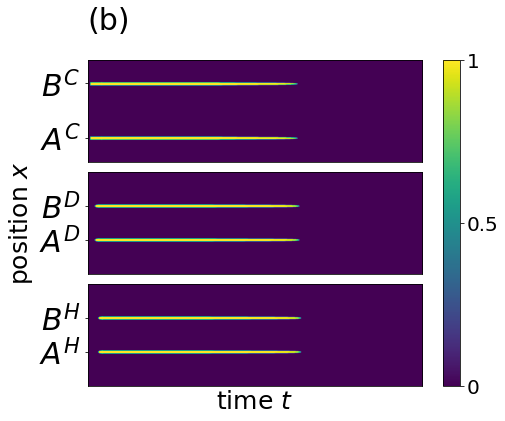

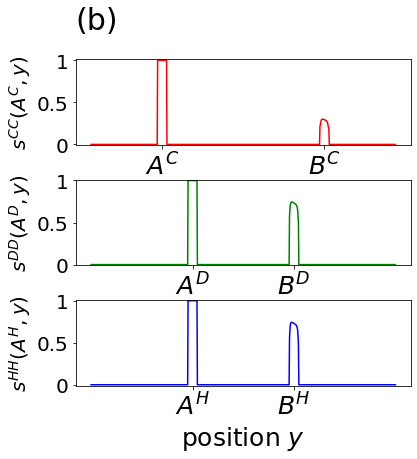

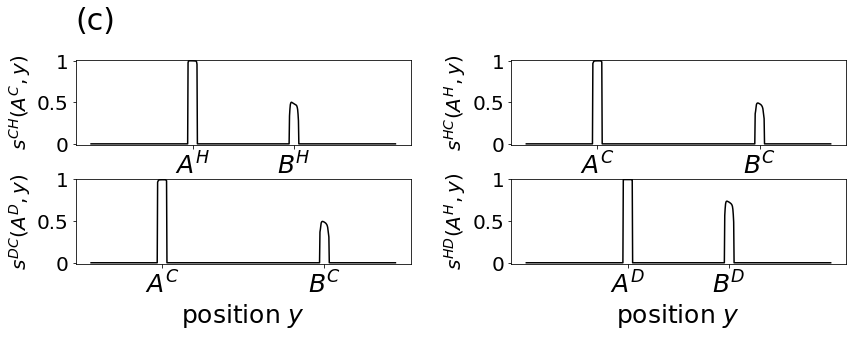

In [37]:
# Encoding phase
folder='./figuresLOOPpaper/'
save = 0
Ru = 1

## Parameters
# time and space
dt = 0.1
xm = 30; dx = 0.08
Lx = np.arange(-xm,xm+dx,dx)
X = np.array([Lx,]*math.ceil((2*xm+dx)/dx)).transpose()
Y = np.array([Lx,]*math.ceil((2*xm+dx)/dx))

# Conenctions between fields
Ghc = 1; Gch = 1; Gh = 1; Gc = 1; Ghd = 0.5; Gd = 1; Gdc = 1; Ghc = 0.5 # receive one or two inputs
Gcext = 1

# permanent kernels
AH = -10; BH = -AH; AC = -16; BC = -AC; AD = AH; BD = BH
Dch = BC-BH; Dhc = BH-BC; Ddc = BD-BC; Dhd = 0
s = 1.5
a = 0.9
[WFc,WFh,WFd,WFch,WFhc,WFdc,WFhd] = BCO(s,Lx) # Boundary conditions

# learning weights
Ad =  3
c0 = 8e-7 
epsW = 0.00001
sw = s*6
wM = 1

gamma = 1.5
cr = 0.2
gammac = gamma; gammah = gamma; gammad = gamma; gammach = cr*gamma
gammahc = cr*gamma;gammahd = cr*gamma; gammadc = cr*gamma

wc = np.zeros((len(Lx),len(Lx))); wh = np.zeros((len(Lx),len(Lx)));
wch = np.zeros((len(Lx),len(Lx))); whc = np.zeros((len(Lx),len(Lx))); 
wd = np.zeros((len(Lx),len(Lx))); wdc = np.zeros((len(Lx),len(Lx))); whd = np.zeros((len(Lx),len(Lx)))

# thresholds
h0 = h(AC-a,AC-a,AC+a,s)+h(AC-a,BC-a,BC+a,s)
hc0 = h0 
hh0 = h0 
hd0 = h0

hf = 250
hfh = 50
taudh = 0.8
FFT = hc0

# synaptic depression
alq0 = 800
et = 0.2
bq = 0.01

alh = 10000
bh = 0.001

FalK = 0.5
taual = 100000

#Neurogenesis
DD = 4*dx
fng = 0.001
BCNG = np.zeros(len(Lx))

# External stimuli
Xz = np.array([[AC-a,AC+a,BC-a,BC+a],[AD-a,AD+a,BD-a,BD+a],[AH-a,AH+a,BH-a,BH+a]])
alpha = 0
BW = (np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1)) + (np.heaviside(Lx-Xz[alpha,2],1)-np.heaviside(Lx-Xz[alpha,3],1))

# Duration and number of steps
D = 60
Di = D-5
time = D
Lt = np.arange(0,time,dt)
TcycleC = 1*D; TcycleH = 3*D; Nsteps = 15

Treg = time-dt # recording
T = 1e3 # intersteps time

# External stimuli
Tbegc = np.arange(0,TcycleC,D)
Tbeg = TcycleC+np.arange(0,TcycleH,D)
Tbegc = np.concatenate([Tbegc,np.array([D])])
Tbegc = np.concatenate([Tbegc,np.array([time + dt])])
Tbeg = np.concatenate([Tbeg,np.array([time + dt])]) + time

tc = 1.8
th = 1.2
Ph = 1.6
FF = 1.5

Tendc = Tbegc+tc
Ih = Ph*hh0
Tend = Tbeg+th
TNG = np.array([Di-5,time+dt]) + time
TAa = np.arange(Di,time+dt,D)
TAa = np.concatenate([TAa,np.array([time + dt])])

LIc = np.zeros((len(Lx),len(Tbegc)))
LIcN = np.zeros(len(Tbegc))

Ic = FF*BW

LIc[:,0] = FF*BW
LIcN[0] = 2
alpha = 0
for i in range(1,len(Tbegc)):
    if (i%2)==0:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1))
        LIcN[i] = 0
    else:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,2],1)-np.heaviside(Lx-Xz[alpha,3],1))
        LIcN[i] = 1
        

# Main loop
num = '1'
[wc,wh,wd,wch,whc,wdc,whd,uc,uh,ud,hcf,hhf,hdf,LwAcBc,LwAdBd,LwAhBh] = loopRu(num,wc,wh,wd,wch,whc,wdc,whd)



Tbeg,Tbegc [120.  180.  240.  120.1] [ 0.  60.1] [55.  60.1]


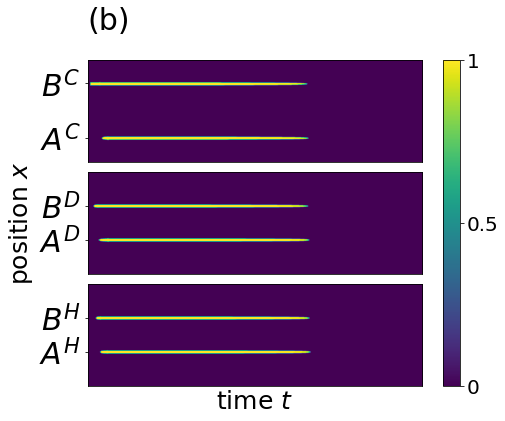

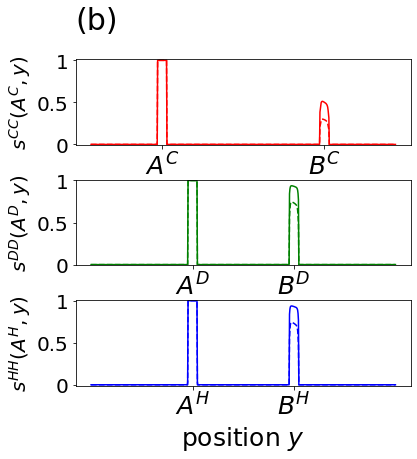

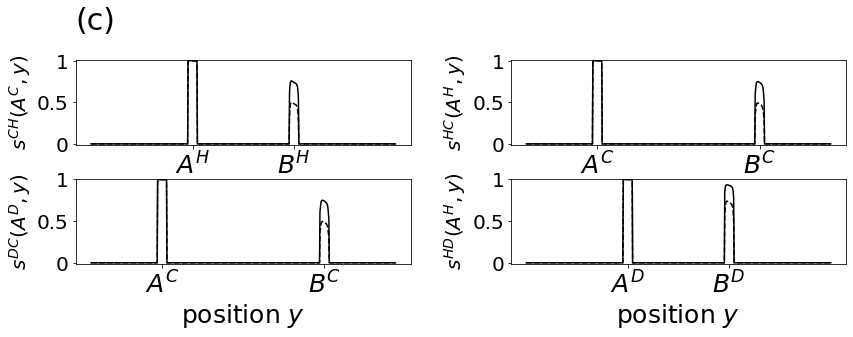

In [38]:
#Phase 2: retrieval cue
save = 0
Ru = 1

time = D
Lt = np.arange(0,time,dt)
Treg = time-dt

LIc = np.zeros((len(Lx),len(Tbegc)))
LIc[:,0] = FF*(np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1))
for i in range(1,len(Tbegc)):
    if (i%2)==0:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1))
    else:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,2],1)-np.heaviside(Lx-Xz[alpha,3],1)) 
        
Ih = 0
Tbegc = np.array([0,time+dt]) 
Tendc = Tbegc+tc
TNG = np.array([Di-5,time+dt]) + time
TAa = np.array([Di,time+dt])

num = '2'
[wc2,wh2,wd2,wch2,whc2,wdc2,whd2,uc,uh,ud,hcf,hhf,hdf,LwAcBc,LwAdBd,LwAhBh] = loopRu(num,wc,wh,wd,wch,whc,wdc,whd)


Lesion


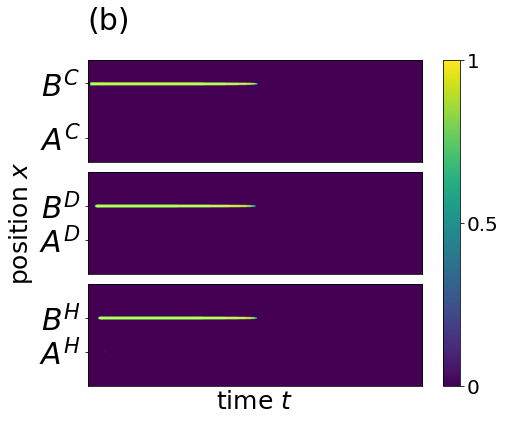

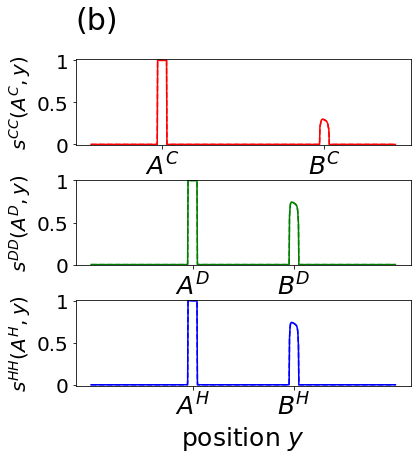

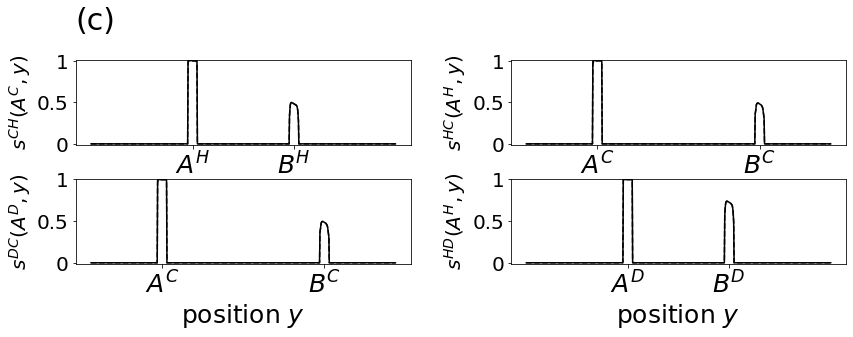

In [39]:
#Phase 2: retrieval cue TEST
save = 0
Ru = 1

time = D
Lt = np.arange(0,time,dt)
Treg = time-dt

LIc = np.zeros((len(Lx),len(Tbegc)))
LIc[:,0] = FF*(np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1))
for i in range(1,len(Tbegc)):
    if (i%2)==0:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1))
    else:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,2],1)-np.heaviside(Lx-Xz[alpha,3],1)) 
    
Ih = 0
Tbegc = np.array([0,time+dt])
Tendc = Tbegc+tc
TNG = np.array([Di-5,time+dt])+time
TAa = np.array([Di,time+dt])
num = '2Test'
[wc22,wh22,wd22,wch22,whc22,wdc22,whd22,uc,uh,ud,hcf,hhf,hdf,LwAcBc,LwAdBd,LwAhBh] = loopRu(num,wc,wh,wd,wch,whc,wdc,whd)

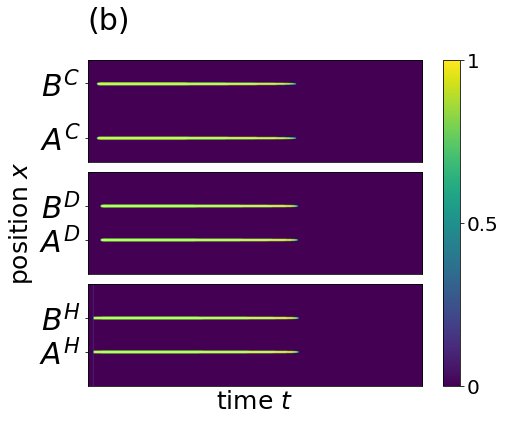

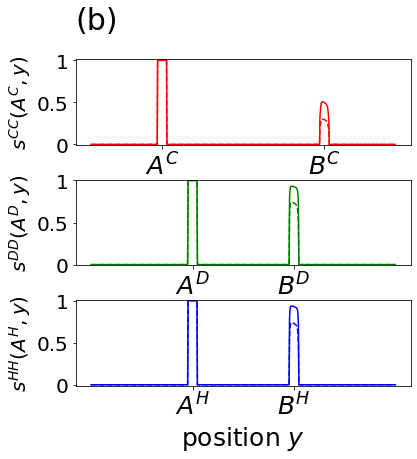

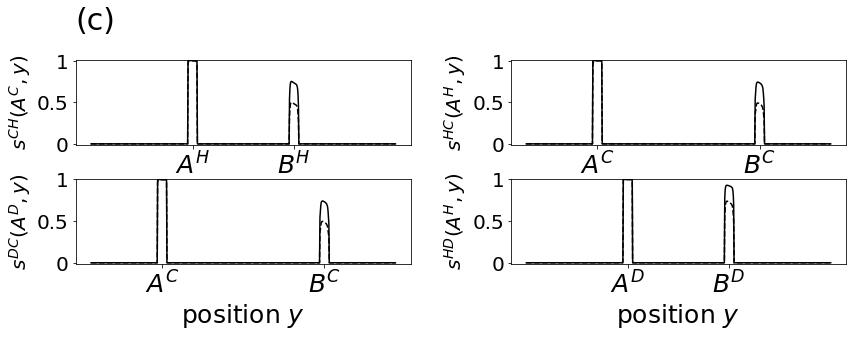

In [41]:
#Phase 3: H replay
save = 0
Ru = 1

time = D
Lt = np.arange(0,time,dt)
Treg = time-dt

Ih = Ph*hh0
Tbegc = np.array([0,time+dt])+time
Tendc = Tbegc+tc
TNG = np.array([Di-5,time+dt]) + time
TAa = np.array([Di,time+dt])+time
Tbeg = np.array([0,time+dt])
Tend = Tbeg+th

num = '3'
[wc3,wh3,wd3,wch3,whc3,wdc3,whd3,uc,uh,ud,hcf,hhf,hdf,LwAcBc,LwAdBd,LwAhBh] = loopRu(num,wc,wh,wd,wch,whc,wdc,whd)


In [ ]:
##############################################################

In [49]:
# Whole consolidation process
save = 0
Ru = 1
num = 'cons'

wci = np.zeros((len(Lx),len(Lx))); whi = np.zeros((len(Lx),len(Lx)));
wchi = np.zeros((len(Lx),len(Lx))); whci = np.zeros((len(Lx),len(Lx))); 
wdi = np.zeros((len(Lx),len(Lx))); wdci = np.zeros((len(Lx),len(Lx))); whdi = np.zeros((len(Lx),len(Lx)))

#################
D = 60
Di = D-5
TcycleC = 1*D; TcycleH = 1*D; Nsteps = 7
time = (TcycleC+TcycleH)*Nsteps
Lt = np.arange(0,time,dt)

Treg = time-dt
Tbegc = np.arange(0,TcycleC,D)
Tbeg = np.arange(0,TcycleH,D)+TcycleC
TAa = np.array([Di])
for k in range(1,Nsteps,1):
    Tbegc = np.concatenate([Tbegc,k*(TcycleH+TcycleC)+np.arange(0,TcycleC,D)])
    TAa = np.concatenate([TAa,[Tbegc[-1]-5]])
    Tbeg = np.concatenate([Tbeg,k*(TcycleH+TcycleC)+TcycleC+np.arange(0,TcycleH,D)])
    TAa = np.concatenate([TAa,[Tbeg[-1]-5]])
    
Tbegc = np.concatenate([Tbegc,np.array([time+dt])])
Tbeg = np.concatenate([Tbeg,np.array([time+dt])])
TAa = np.concatenate([TAa,np.array([time+dt])])
Tendc = Tbegc+tc
Tend = Tbeg+th 
TNG = np.array([Di-5,time+dt]) + time

############

Ih = Ph*hh0 

LIc = np.zeros((len(Lx),len(Tbegc)))
LIc[:,0] = FF*(np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1) + np.heaviside(Lx-Xz[alpha,2],1)-np.heaviside(Lx-Xz[alpha,3],1))
for i in range(1,len(Tbegc)):
    if (i%2)==0:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1))
    else:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,2],1)-np.heaviside(Lx-Xz[alpha,3],1))
        
# Main loop
[wcC,whC,wdC,wchC,whcC,wdcC,whdC,ucC,uhC,udC,hcfC,hhfC,hdfC,LwAcBcC,LwAdBdC,LwAhBhC] = loopRu(num,wci,whi,wdi,wchi,whci,wdci,whdi)

In [ ]:
#Phase 2: retrieval cue TEST END
save = 0
Ru = 1
num = '2TestEND'

time = D
Lt = np.arange(0,time,dt)
Treg = time-dt

LIc = np.zeros((len(Lx),len(Tbegc)))
LIc[:,0] = FF*(np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1))
for i in range(1,len(Tbegc)):
    if (i%2)==0:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1))
    else:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,2],1)-np.heaviside(Lx-Xz[alpha,3],1)) 
    
Ih = 0
Tbegc = np.array([0,time+dt])
Tendc = Tbegc+tc
TNG = np.array([Di-5,time+dt]) + time
TAa = np.array([Di,time+dt])

[wc22E,wh22E,wd22E,wch22E,whc22E,wdc22E,whd22E,uc,uh,ud,hcf,hhf,hdf,LwAcBc,LwAdBd,LwAhBh] = loopRu(num,wcC,whC,wdC,wchC,whcC,wdcC,whdC)

NG ok
t = 60.0


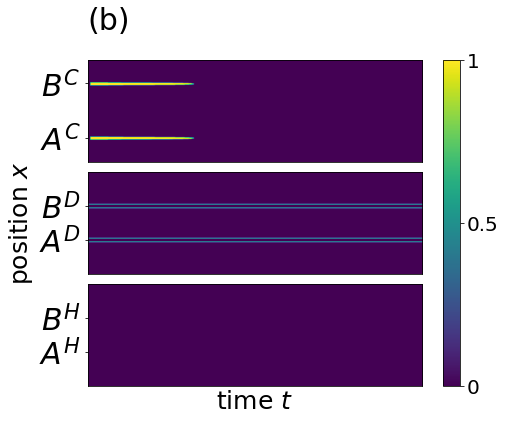

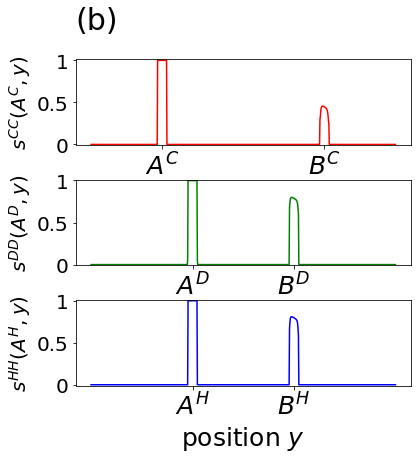

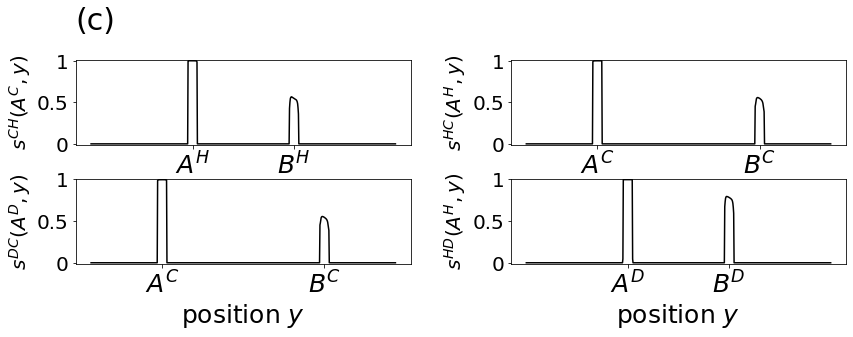

In [61]:
# Forgetting process
save = 0
Ru = 1

num='NGrc' # Retrieval cue
#num = 'NGhr' # Hippocampal replay

wci = np.zeros((len(Lx),len(Lx))); whi = np.zeros((len(Lx),len(Lx)));
wchi = np.zeros((len(Lx),len(Lx))); whci = np.zeros((len(Lx),len(Lx))); 
wdi = np.zeros((len(Lx),len(Lx))); wdci = np.zeros((len(Lx),len(Lx))); whdi = np.zeros((len(Lx),len(Lx)))

#################
D = 60
Di = D-5
TcycleC = 1*D; TcycleH = 1*D; Nsteps = 2
if num=='NGrc':
    time = (TcycleC+TcycleH)*Nsteps - 2*TcycleC
elif num=='NGhr':
    time = (TcycleC+TcycleH)*Nsteps - TcycleC
    
Lt = np.arange(0,time,dt)   
Treg = D
Tbegc = np.arange(0,TcycleC,D)+TcycleH
Tbeg = np.arange(0,TcycleH,D)
TAa = np.array([Di])
for k in range(1,Nsteps,1):
    Tbeg = np.concatenate([Tbeg,k*(TcycleH+TcycleC)+np.arange(0,TcycleH,D)])
    TAa = np.concatenate([TAa,[Tbeg[-1]-5]])
    Tbegc = np.concatenate([Tbegc,k*(TcycleH+TcycleC)+TcycleH+np.arange(0,TcycleC,D)])
    TAa = np.concatenate([TAa,[Tbegc[-1]-5]])
    
Tbegc = np.concatenate([Tbegc,np.array([time+dt])])
Tbeg = np.concatenate([Tbeg,np.array([time+dt])])
TAa = np.concatenate([TAa,np.array([time+dt])])
Tendc = Tbegc+tc

Tend = Tbeg+th
TNG = np.array([Di-5,time+dt])
############

Ih = Ph*hh0

LIc = np.zeros((len(Lx),len(Tbegc)))
LIc[:,0] = FF*(np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1) + np.heaviside(Lx-Xz[alpha,2],1)-np.heaviside(Lx-Xz[alpha,3],1))
for i in range(1,len(Tbegc)):
    if (i%2)==0:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1))
    else:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,2],1)-np.heaviside(Lx-Xz[alpha,3],1))
        
# Main loop
[wcNG2,whNG2,wdNG2,wchNG2,whcNG2,wdcNG2,whdNG2,ucNG,uhNG,udNG,hcfNG,hhfNG,hdfNG,LwAcBcNG,LwAdBdNG,LwAhBhNG] = loopRu(num,wcC,whC,wdC,wchC,whcC,wdcC,whdC)


Di= 55
time= 39000
Tbeg,Tbegc,TAa [    0   120   240   360   480   600   720   840   960  1080  1200  1320
  1440  1560  1680  1800  1920  2040  2160  2280  2400  2520  2640  2760
  2880  3000  3120  3240  3360  3480  3600  3720  3840  3960  4080  4200
  4320  4440  4560  4680  4800  4920  5040  5160  5280  5400  5520  5640
  5760  5880  6000  6120  6240  6360  6480  6600  6720  6840  6960  7080
  7200  7320  7440  7560  7680  7800  7920  8040  8160  8280  8400  8520
  8640  8760  8880  9000  9120  9240  9360  9480  9600  9720  9840  9960
 10080 10200 10320 10440 10560 10680 10800 10920 11040 11160 11280 11400
 11520 11640 11760 11880 12000 12120 12240 12360 12480 12600 12720 12840
 12960 13080 13200 13320 13440 13560 13680 13800 13920 14040 14160 14280
 14400 14520 14640 14760 14880 15000 15120 15240 15360 15480 15600 15720
 15840 15960 16080 16200 16320 16440 16560 16680 16800 16920 17040 17160
 17280 17400 17520 17640 17760 17880 18000 18120 18240 18360 18480 18600
 18720 18840 1896

2351.3675740853964
2349.086360959988
TAa u -0.0 0.19196352501363834 0.04193004473715817
TAa s 0.0 0.5 0.5
les w TAa [[0.99337562]] [[0.99822946]] [[0.99823427]]
T 119.9
ok itth! t= 121.2
2348.9503939410147
2346.7407090400347
TAa u 0.0 0.3914370877316882 0.08698372419464326
TAa s 0.0 0.5 0.5
les w TAa [[0.99252161]] [[0.9973796]] [[0.99738441]]
T 179.9
ok ittc! t= 181.8
2346.608493951474
2344.401416168616
TAa u -0.0 0.23314920926818855 0.049020515722602506
TAa s 0.0 0.5 0.5
les w TAa [[0.99334654]] [[0.99652902]] [[0.99653384]]
T 239.9
ok itth! t= 241.20000000000002
2344.2687776710345
2342.0544302271983
TAa u 0.0 0.3806542133688412 0.07968596578174465
TAa s 0.0 0.5 0.5
les w TAa [[0.9924925]] [[0.99567771]] [[0.99568253]]
T 299.90000000000003
ok ittc! t= 301.8
2341.921342118702
2339.6992545358844
TAa u -0.0 0.24902491697521495 0.052035066510613195
TAa s 0.0 0.5 0.5
les w TAa [[0.99332445]] [[0.99482567]] [[0.9948305]]
T 359.90000000000003
ok itth! t= 361.20000000000005
2339.565686394601

T 2579.9
ok ittc! t= 2581.8
2250.57575685175
2248.4704056507553
TAa u -0.0 0.2712780832354952 0.055498993596206594
TAa s 0.0 0.5 0.5
les w TAa [[0.99325151]] [[0.96188917]] [[0.96189416]]
T 2639.9
ok itth! t= 2641.2000000000003
2248.3440053010004
2246.2360053646094
TAa u 0.0 0.3448445195515592 0.07092261898686086
TAa s 0.0 0.5 0.5
les w TAa [[0.99239739]] [[0.96100718]] [[0.96101217]]
T 2699.9
ok ittc! t= 2701.8
2246.109445542664
2243.9987784729915
TAa u -0.0 0.2710523225746801 0.05541842789745539
TAa s 0.0 0.5 0.5
les w TAa [[0.99325137]] [[0.96012437]] [[0.96012937]]
T 2759.9
ok itth! t= 2761.2000000000003
2243.8720580631157
2241.758705061572
TAa u 0.0 0.3450144419031863 0.07098710290498887
TAa s 0.0 0.5 0.5
les w TAa [[0.99239725]] [[0.95924076]] [[0.95924576]]
T 2819.9
ok ittc! t= 2821.8
2241.631822923507
2239.51576477469
TAa u -0.0 0.2711414842189899 0.05546730485254055
TAa s 0.0 0.5 0.5
les w TAa [[0.99325126]] [[0.95835633]] [[0.95836134]]
T 2879.9
ok itth! t= 2881.2000000000003

T 5099.900000000001
ok ittc! t= 5101.8
2154.1298391992045
2151.889555336595
TAa u -0.0 0.27812874101626894 0.055312274457646415
TAa s 0.0 0.5 0.5
les w TAa [[0.99325065]] [[0.92412095]] [[0.92412615]]
T 5159.900000000001
ok itth! t= 5161.200000000001
2151.7550136443565
2149.5105484884757
TAa u 0.0 0.3547124893714647 0.07089911268664956
TAa s 0.0 0.5 0.5
les w TAa [[0.99239653]] [[0.92320288]] [[0.92320808]]
T 5219.900000000001
ok ittc! t= 5221.8
2149.3757535267696
2147.127025718484
TAa u -0.0 0.27855365573279023 0.0552784268959095
TAa s 0.0 0.5 0.5
les w TAa [[0.99325065]] [[0.92228389]] [[0.92228909]]
T 5279.900000000001
ok itth! t= 5281.200000000001
2146.991972452759
2144.7388953564937
TAa u 0.0 0.3550020033155054 0.07082835955079615
TAa s 0.0 0.5 0.5
les w TAa [[0.99239653]] [[0.92136398]] [[0.92136919]]
T 5339.900000000001
ok ittc! t= 5341.8
2144.603578418905
2142.346059538426
TAa u -0.0 0.2784158345635864 0.05531210713592849
TAa s 0.0 0.5 0.5
les w TAa [[0.99325062]] [[0.92044316]

2054.023366987742
2051.552993485073
TAa u -0.0 0.2688359709202898 0.058441144044499994
TAa s 0.0 0.5 0.5
les w TAa [[0.99325037]] [[0.8866568]] [[0.88666221]]
T 7559.900000000001
ok itth! t= 7561.200000000001
2051.4084106284026
2048.9818793807694
TAa u 0.0 0.34478845441447137 0.07712818129540393
TAa s 0.0 0.5 0.5
les w TAa [[0.99239625]] [[0.88569989]] [[0.88570531]]
T 7619.900000000001
ok ittc! t= 7621.8
2048.834728037709
2046.3792495424334
TAa u -0.0 0.26888699432691976 0.058491770591867394
TAa s 0.0 0.5 0.5
les w TAa [[0.99325036]] [[0.88474195]] [[0.88474738]]
T 7679.900000000001
ok itth! t= 7681.200000000001
2046.2342594779363
2043.7900334481344
TAa u 0.0 0.3448582682489485 0.07708039503443101
TAa s 0.0 0.5 0.5
les w TAa [[0.99239624]] [[0.88378297]] [[0.8837884]]
T 7739.900000000001
ok ittc! t= 7741.8
2043.6381710409025
2041.2092778147692
TAa u -0.0 0.2688890788220349 0.05840005079346382
TAa s 0.0 0.5 0.5
les w TAa [[0.99325034]] [[0.88282295]] [[0.88282839]]
T 7799.900000000001


T 10019.900000000001
ok ittc! t= 10021.800000000001
1947.3427258522759
1944.9199730568332
TAa u -0.0 0.26932221700605075 0.058279257477665346
TAa s 0.0 0.5 0.5
les w TAa [[0.99324913]] [[0.84553481]] [[0.84554048]]
T 10079.900000000001
ok itth! t= 10081.2
1944.7741488951992
1942.3339208469938
TAa u 0.0 0.3448707309613458 0.07738676270028731
TAa s 0.0 0.5 0.5
les w TAa [[0.992395]] [[0.84453131]] [[0.84453699]]
T 10139.900000000001
ok ittc! t= 10141.800000000001
1942.1867908302145
1939.7086574729312
TAa u -0.0 0.2691596057883027 0.058212211019389545
TAa s 0.0 0.5 0.5
les w TAa [[0.99324938]] [[0.84352661]] [[0.8435323]]
T 10199.900000000001
ok itth! t= 10201.2
1939.5551498410732
1937.0954440076432
TAa u 0.0 0.3447877314847985 0.07746351770411448
TAa s 0.0 0.5 0.5
les w TAa [[0.99239526]] [[0.84252072]] [[0.84252642]]
T 10259.900000000001
ok ittc! t= 10261.800000000001
1936.9484246756144
1934.4750719766157
TAa u -0.0 0.2693027454879665 0.058283406026776674
TAa s 0.0 0.5 0.5
les w TAa [[0

T 12419.900000000001
ok ittc! t= 12421.800000000001
1842.9472332631806
1840.5242559327532
TAa u -0.0 0.27000026214065737 0.059601495734387604
TAa s 0.0 0.5 0.5
les w TAa [[0.99308014]] [[0.804419]] [[0.80442497]]
T 12479.900000000001
ok itth! t= 12481.2
1840.378267537924
1837.9235712525856
TAa u 0.0 0.3434770565884322 0.0756650187135607
TAa s 0.0 0.5 0.5
les w TAa [[0.99222587]] [[0.80336415]] [[0.80337012]]
T 12539.900000000001
ok ittc! t= 12541.800000000001
1837.772972565092
1835.3301989237268
TAa u -0.0 0.2701599352142459 0.05975432158837338
TAa s 0.0 0.5 0.5
les w TAa [[0.99307158]] [[0.8023079]] [[0.80231389]]
T 12599.900000000001
ok itth! t= 12601.2
1835.1848256203434
1832.7483974068468
TAa u 0.0 0.34347057403553377 0.07544335938117501
TAa s 0.0 0.5 0.5
les w TAa [[0.99221731]] [[0.80125027]] [[0.80125626]]
T 12659.900000000001
ok ittc! t= 12661.800000000001
1832.600914429851
1830.1412227107187
TAa u -0.0 0.27016677402119105 0.060092273975655495
TAa s 0.0 0.5 0.5
les w TAa [[0.99

T 14819.900000000001
ok ittc! t= 14821.800000000001
1740.3288946969878
1737.8649446303782
TAa u -0.0 0.27056576985073416 0.06172712808914293
TAa s 0.0 0.5 0.5
les w TAa [[0.9930358]] [[0.76108528]] [[0.76109158]]
T 14879.900000000001
ok itth! t= 14881.2
1737.7169889358518
1735.2490745767197
TAa u 0.0 0.3460645622993706 0.0729167034314176
TAa s 0.0 0.5 0.5
les w TAa [[0.99218149]] [[0.75997027]] [[0.75997659]]
T 14939.900000000001
ok ittc! t= 14941.800000000001
1735.1008803219652
1732.6289781324488
TAa u -0.0 0.2706338205552441 0.06163746288976889
TAa s 0.0 0.5 0.5
les w TAa [[0.99303653]] [[0.75885364]] [[0.75885996]]
T 14999.900000000001
ok itth! t= 15001.2
1732.4805438946628
1730.004629982142
TAa u 0.0 0.3462825208532035 0.07300673330969906
TAa s 0.0 0.5 0.5
les w TAa [[0.99218223]] [[0.75773535]] [[0.75774169]]
T 15059.900000000001
ok ittc! t= 15061.800000000001
1729.8559543168928
1727.376004422376
TAa u -0.0 0.2705814871888536 0.06178180163448034
TAa s 0.0 0.5 0.5
les w TAa [[0.993

T 17279.9
ok itth! t= 17281.2
1629.4762559449605
1626.8246742564609
TAa u 0.0 0.3464023074715046 0.07264748716748716
TAa s 0.0 0.5 0.5
les w TAa [[0.99218069]] [[0.71394379]] [[0.71395052]]
T 17339.9
ok ittc! t= 17341.8
1626.6654156084796
1624.0083540205035
TAa u -0.0 0.27070200751784185 0.06186852832290972
TAa s 0.0 0.5 0.5
les w TAa [[0.9930357]] [[0.71275505]] [[0.71276178]]
T 17399.9
ok itth! t= 17401.2
1623.8487646024673
1621.1861562049871
TAa u 0.0 0.34658657133779275 0.07272091201069188
TAa s 0.0 0.5 0.5
les w TAa [[0.99218139]] [[0.71156432]] [[0.71157107]]
T 17459.9
ok ittc! t= 17461.8
1621.0262319048616
1618.3580064339183
TAa u -0.0 0.2706438718767112 0.06199168851810339
TAa s 0.0 0.5 0.5
les w TAa [[0.99303496]] [[0.7103716]] [[0.71037836]]
T 17519.9
ok itth! t= 17521.2
1618.1977429283806
1615.5238264148675
TAa u 0.0 0.34641164611004366 0.07265414654599851
TAa s 0.0 0.5 0.5
les w TAa [[0.99218065]] [[0.70917687]] [[0.70918364]]
T 17579.9
ok ittc! t= 17581.8
1615.363219146691

ok ittc! t= 19861.800000000003
1502.0066045195897
1499.097913858272
TAa u -0.0 0.27065412719594595 0.0620264995264145
TAa s 0.0 0.5 0.5
les w TAa [[0.99303463]] [[0.66089999]] [[0.66090725]]
T 19919.9
ok itth! t= 19921.2
1498.92267200241
1495.9745444668297
TAa u 0.0 0.3464525856111234 0.07268400988578319
TAa s 0.0 0.5 0.5
les w TAa [[0.99218032]] [[0.65961567]] [[0.65962294]]
T 19979.9
ok ittc! t= 19981.800000000003
1495.7913382632469
1492.8720185770342
TAa u -0.0 0.2707132639599306 0.06190733981650029
TAa s 0.0 0.5 0.5
les w TAa [[0.99303524]] [[0.65832883]] [[0.65833612]]
T 20039.9
ok itth! t= 20041.2
1492.6972823314736
1489.773627122378
TAa u 0.0 0.3466334620889234 0.07275318473152237
TAa s 0.0 0.5 0.5
les w TAa [[0.99218093]] [[0.65703948]] [[0.65704678]]
T 20099.9
ok ittc! t= 20101.800000000003
1489.5973291189562
1486.6229535088228
TAa u -0.0 0.2706546383405127 0.06202812438431936
TAa s 0.0 0.5 0.5
les w TAa [[0.9930346]] [[0.65574759]] [[0.65575491]]
T 20159.9
ok itth! t= 20161.2

T 22379.9
ok ittc! t= 22381.800000000003
1368.8329085904309
1365.767093336791
TAa u -0.0 0.2707164308714283 0.06191855238428513
TAa s 0.0 0.5 0.5
les w TAa [[0.99303493]] [[0.60461387]] [[0.6046218]]
T 22439.9
ok itth! t= 22441.2
1365.5775587420712
1362.5405859847797
TAa u 0.0 0.34664576087773724 0.07276230982902601
TAa s 0.0 0.5 0.5
les w TAa [[0.99218063]] [[0.60320971]] [[0.60321767]]
T 22499.9
ok ittc! t= 22501.800000000003
1362.3590073391886
1359.322871753876
TAa u -0.0 0.2706578497165315 0.062039132007789585
TAa s 0.0 0.5 0.5
les w TAa [[0.99303437]] [[0.60180228]] [[0.60181025]]
T 22559.9
ok itth! t= 22561.2
1359.1398891515817
1356.0647259447812
TAa u 0.0 0.346465695810889 0.07269393401991238
TAa s 0.0 0.5 0.5
les w TAa [[0.99218006]] [[0.60039155]] [[0.60039954]]
T 22619.9
ok ittc! t= 22621.800000000003
1355.8840852777453
1352.869856221313
TAa u -0.0 0.2707166442772383 0.06191935849899893
TAa s 0.0 0.5 0.5
les w TAa [[0.99303491]] [[0.59897749]] [[0.59898551]]
T 22679.9
ok itth

T 24899.9
ok ittc! t= 24901.800000000003
1228.6348038748743
1225.3075879187952
TAa u -0.0 0.27065973249187314 0.06204588594168802
TAa s 0.0 0.5 0.5
les w TAa [[0.99303418]] [[0.54251928]] [[0.54252813]]
T 24959.9
ok itth! t= 24961.2
1225.1076676391194
1221.7708464609843
TAa u 0.0 0.3464721365325102 0.07269896298642077
TAa s 0.0 0.5 0.5
les w TAa [[0.99217988]] [[0.54095397]] [[0.54096284]]
T 25019.9
ok ittc! t= 25021.800000000003
1221.5703473698425
1218.2238372985805
TAa u -0.0 0.270718384630682 0.06192592197913578
TAa s 0.0 0.5 0.5
les w TAa [[0.99303468]] [[0.53938412]] [[0.53939302]]
T 25079.9
ok itth! t= 25081.2
1218.0227543392969
1214.6664704819605
TAa u 0.0 0.3466533800930802 0.07276807555286405
TAa s 0.0 0.5 0.5
les w TAa [[0.99218037]] [[0.53780969]] [[0.53781861]]
T 25139.9
ok ittc! t= 25141.800000000003
1214.4647985237984
1211.098654740438
TAa u -0.0 0.2706598892549185 0.062046439576678825
TAa s 0.0 0.5 0.5
les w TAa [[0.99303417]] [[0.53623064]] [[0.53623959]]
T 25199.9
ok i

T 27419.9
ok ittc! t= 27421.800000000003
1070.5358318443666
1066.7156043437806
TAa u -0.0 0.2707195249000291 0.061930731061414605
TAa s 0.0 0.5 0.5
les w TAa [[0.9930345]] [[0.472331]] [[0.47234116]]
T 27479.9
ok itth! t= 27481.2
1066.4859555763633
1062.651168976277
TAa u 0.0 0.3466802320412999 0.07277166580126089
TAa s 0.0 0.5 0.5
les w TAa [[0.99218019]] [[0.47053226]] [[0.47054246]]
T 27539.9
ok ittc! t= 27541.800000000003
1062.4206416623183
1058.5711282238847
TAa u -0.0 0.2706610499653365 0.06205120150943932
TAa s 0.0 0.5 0.5
les w TAa [[0.99303403]] [[0.46872662]] [[0.46873686]]
T 27599.9
ok itth! t= 27601.2
1058.3397122025308
1054.475300940965
TAa u 0.0 0.34650187830901535 0.07270271078678306
TAa s 0.0 0.5 0.5
les w TAa [[0.99217972]] [[0.466914]] [[0.46692428]]
T 27659.9
ok ittc! t= 27661.800000000003
1054.2429858539776
1050.3635024499326
TAa u -0.0 0.27071958504320864 0.06193116474497583
TAa s 0.0 0.5 0.5
les w TAa [[0.99303448]] [[0.46509431]] [[0.46510463]]
T 27719.9
ok itth!

884.6189985716098
879.9920383059367
TAa u -0.0 0.2706617466491015 0.06205516939518518
TAa s 0.0 0.5 0.5
les w TAa [[0.99303392]] [[0.38970018]] [[0.38971249]]
T 29999.9
ok itth! t= 30001.2
879.7136468719775
875.0607493355229
TAa u 0.0 0.3465531686227582 0.07270542495302246
TAa s 0.0 0.5 0.5
les w TAa [[0.99217961]] [[0.38751809]] [[0.38753048]]
T 30059.9
ok ittc! t= 30061.800000000003
874.7807885523877
870.1015125892865
TAa u -0.0 0.2707202797612962 0.06193510849287894
TAa s 0.0 0.5 0.5
les w TAa [[0.99303434]] [[0.38532365]] [[0.3853361]]
T 30119.9
ok itth! t= 30121.2
869.8199556130297
865.1138474176151
TAa u 0.0 0.34673519446650625 0.07277486851916333
TAa s 0.0 0.5 0.5
les w TAa [[0.99218003]] [[0.38311664]] [[0.38312917]]
T 30179.9
ok ittc! t= 30181.800000000003
864.8306666301487
860.0972592332193
TAa u -0.0 0.27066185814614135 0.062055507233066395
TAa s 0.0 0.5 0.5
les w TAa [[0.99303391]] [[0.38089684]] [[0.38090944]]
T 30239.9
ok itth! t= 30241.2
859.8124262106907
855.05123893863

T 32519.9
ok itth! t= 32521.2
640.6236601629365
634.2190388265758
TAa u 0.0 0.34673782813418574 0.07277695217892229
TAa s 0.0 0.5 0.5
les w TAa [[0.99217991]] [[0.28096335]] [[0.28098043]]
T 32579.9
ok ittc! t= 32581.800000000003
633.8327035900957
627.3587517503419
TAa u -0.0 0.2706628583346357 0.06205822092721561
TAa s 0.0 0.5 0.5
les w TAa [[0.99303382]] [[0.27792888]] [[0.27794615]]
T 32639.9
ok itth! t= 32641.2
626.9681888535835
620.4226047027963
TAa u 0.0 0.34655567080616984 0.07270751769421387
TAa s 0.0 0.5 0.5
les w TAa [[0.99217951]] [[0.27486092]] [[0.27487838]]
T 32699.9
ok ittc! t= 32701.800000000003
620.0276722268429
613.4080236772062
TAa u -0.0 0.27072141078167705 0.06193814295447042
TAa s 0.0 0.5 0.5
les w TAa [[0.99303421]] [[0.27175833]] [[0.27177598]]
T 32759.9
ok itth! t= 32761.2
613.0085715797046
606.3122856983036
TAa u 0.0 0.346738035717666 0.07277712132675807
TAa s 0.0 0.5 0.5
les w TAa [[0.9921799]] [[0.2686199]] [[0.26863776]]
T 32819.9
ok ittc! t= 32821.8
605.90

216.25133807994672
196.38586478035603
TAa u 0.0 0.34643982483158425 0.07270305348695817
TAa s 0.0 0.5 0.5
les w TAa [[0.99217944]] [[0.08781954]] [[0.08787416]]
T 35099.9
ok ittc! t= 35101.8
195.12472997270484
172.72640687546112
TAa u -0.0 0.2710556135421033 0.061938149531014466
TAa s 0.0 0.5 0.5
les w TAa [[0.99303411]] [[0.07756595]] [[0.07762779]]
T 35159.9
ok itth! t= 35161.200000000004
171.29341875198824
145.38620090116922
TAa u 0.0 0.3466175103683936 0.07277189902424755
TAa s 0.0 0.5 0.5
les w TAa [[0.99217981]] [[0.06573214]] [[0.0658051]]
T 35219.9
ok ittc! t= 35221.8
143.70959987778483
112.38307094095862
TAa u -0.0 0.2709888306975754 0.062057866408367156
TAa s 0.0 0.5 0.5
les w TAa [[0.99303374]] [[0.0512348]] [[0.05132837]]
T 35279.9
ok itth! t= 35281.200000000004
110.26463542771361
66.35062623867118
TAa u 0.0 0.3464318865802503 0.07270146194042346
TAa s 0.0 0.5 0.5
les w TAa [[0.99217943]] [[0.03048641]] [[0.03064338]]
T 35339.9
ok ittc! t= 35341.8
62.737267421476595
0.0
TAa

T 38219.9
ok ittc! t= 38221.8
0.0
0.0
TAa u -0.0 0.1209275745997201 0.06046378729986005
TAa s 0.0 0.5 0.5
les w TAa [[0.99226836]] [[-0.]] [[-0.]]
T 38279.9
ok itth! t= 38281.200000000004
0.0
0.0
TAa u 0.0 0.15069207618082486 0.07534603809041243
TAa s 0.0 0.5 0.5
les w TAa [[0.99141339]] [[-0.]] [[-0.]]
T 38339.9
ok ittc! t= 38341.8
0.0
0.0
TAa u -0.0 0.1211398876891027 0.06056994384455135
TAa s 0.0 0.5 0.5
les w TAa [[0.99227124]] [[-0.]] [[-0.]]
T 38399.9
ok itth! t= 38401.200000000004
0.0
0.0
TAa u 0.0 0.15051078587425873 0.07525539293712936
TAa s 0.0 0.5 0.5
les w TAa [[0.99141627]] [[-0.]] [[-0.]]
T 38459.9
ok ittc! t= 38461.8
0.0
0.0
TAa u -0.0 0.12091299825785012 0.06045649912892506
TAa s 0.0 0.5 0.5
les w TAa [[0.99226698]] [[-0.]] [[-0.]]
T 38519.9
ok itth! t= 38521.200000000004
0.0
0.0
TAa u 0.0 0.15067035512004895 0.07533517756002447
TAa s 0.0 0.5 0.5
les w TAa [[0.99141201]] [[-0.]] [[-0.]]
T 38579.9
ok ittc! t= 38581.8
0.0
0.0
TAa u -0.0 0.12112388577460183 0.0605619428873

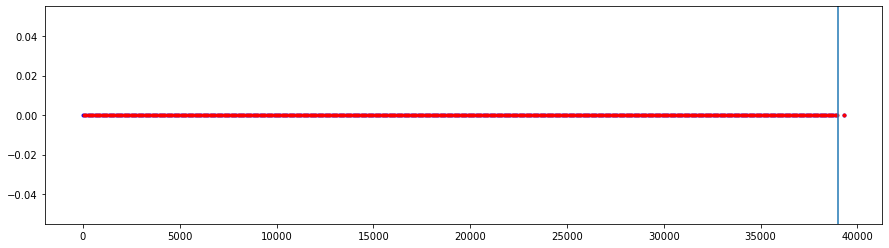

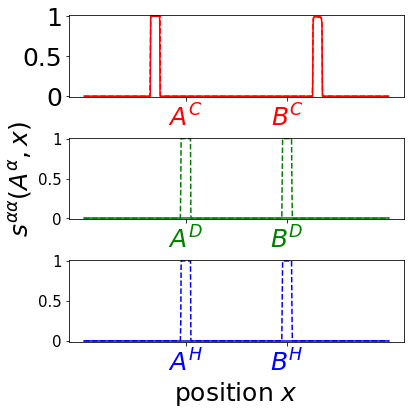

In [90]:
# Whole forgetting process

num = 'NGEND'
save = 0
Ru = 0

wci = np.zeros((len(Lx),len(Lx))); whi = np.zeros((len(Lx),len(Lx)));
wchi = np.zeros((len(Lx),len(Lx))); whci = np.zeros((len(Lx),len(Lx))); 
wdi = np.zeros((len(Lx),len(Lx))); wdci = np.zeros((len(Lx),len(Lx))); whdi = np.zeros((len(Lx),len(Lx)))

#################
D = 60
Di = D-5
TcycleC = 1*D; TcycleH = 1*D; Nsteps = 325
time = (TcycleC+TcycleH)*Nsteps

Treg = time-dt
Tbegc = np.arange(0,TcycleC,D)+TcycleH
Tbeg = np.arange(0,TcycleH,D)
TAa = np.array([Di])
for k in range(1,Nsteps,1):
    Tbeg = np.concatenate([Tbeg,k*(TcycleH+TcycleC)+np.arange(0,TcycleH,D)])
    TAa = np.concatenate([TAa,[Tbeg[-1]-5]])
    Tbegc = np.concatenate([Tbegc,k*(TcycleH+TcycleC)+TcycleH+np.arange(0,TcycleC,D)])
    TAa = np.concatenate([TAa,[Tbegc[-1]-5]])
  
Tbegc = np.concatenate([Tbegc,np.array([time+dt])])
Tbeg = np.concatenate([Tbeg,np.array([time+dt])])
TAa = np.concatenate([TAa,np.array([time+dt])])
Tendc = Tbegc+tc

Tend = Tbeg+th
TNG = np.array([Di-5,time+dt])
############

Ih = Ph*hh0

LIc = np.zeros((len(Lx),len(Tbegc)))
LIc[:,0] = FF*(np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1) + np.heaviside(Lx-Xz[alpha,2],1)-np.heaviside(Lx-Xz[alpha,3],1))
for i in range(1,len(Tbegc)):
    if (i%2)==0:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,0],1)-np.heaviside(Lx-Xz[alpha,1],1))
    else:
        LIc[:,i] = FF*(np.heaviside(Lx-Xz[alpha,2],1)-np.heaviside(Lx-Xz[alpha,3],1))
        
# Main loop
[wcNG2,whNG2,wdNG2,wchNG2,whcNG2,wdcNG2,whdNG2,ucNG,uhNG,udNG,hcfNG,hhfNG,hdfNG,LwAcBcNG2,LwAdBdNG2,LwAhBhNG2] = loopRu(num,wcC,whC,wdC,wchC,whcC,wdcC,whdC)
